## P1 i

<img src="p1a.jpg" alt="descripción_de_la_imagen">

## ii 

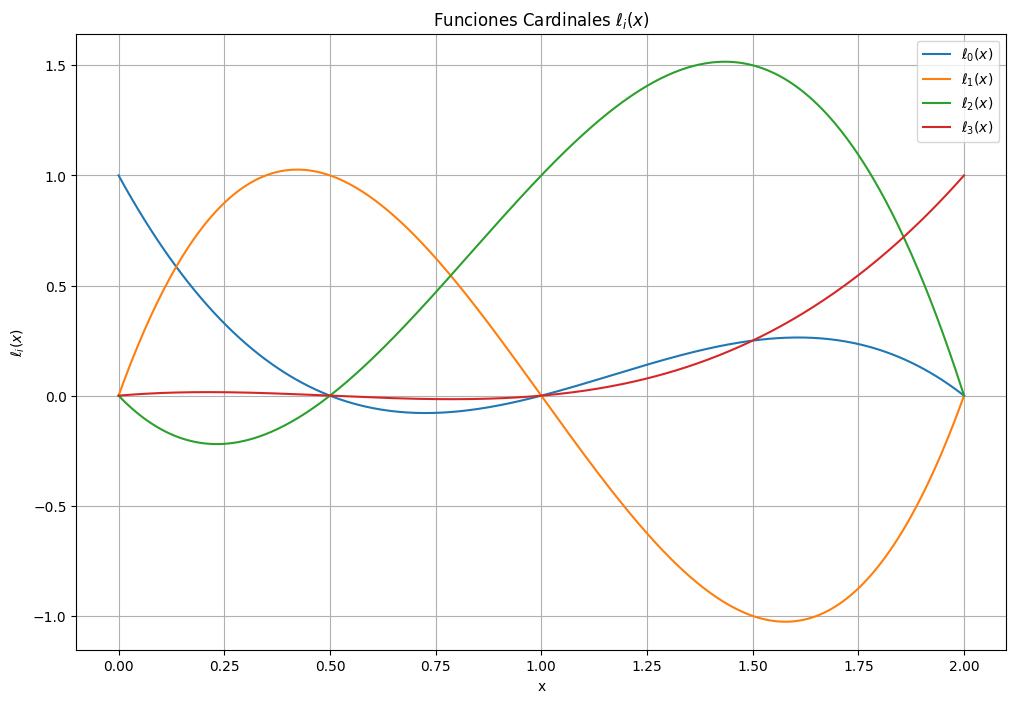

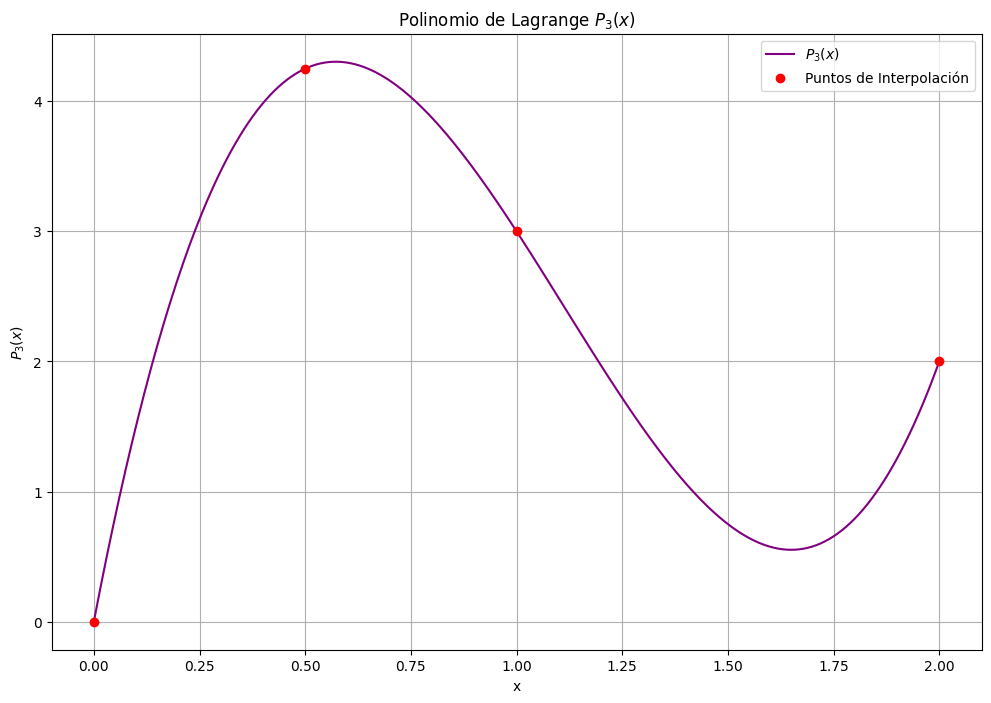

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0, 0.5, 1, 2]
y = [0, 4.25, 3, 2]

polinomio_lagrange = lagrange(x, y)

def l_0(x): return (x - 0.5)*(x - 1)*(x - 2) / ((0 - 0.5)*(0 - 1)*(0 - 2))
def l_1(x): return (x - 0)*(x - 1)*(x - 2) / ((0.5 - 0)*(0.5 - 1)*(0.5 - 2))
def l_2(x): return (x - 0)*(x - 0.5)*(x - 2) / ((1 - 0)*(1 - 0.5)*(1 - 2))
def l_3(x): return (x - 0)*(x - 0.5)*(x - 1) / ((2 - 0)*(2 - 0.5)*(2 - 1))

x_vals = np.linspace(0, 2, 400)

l0_vals = l_0(x_vals)
l1_vals = l_1(x_vals)
l2_vals = l_2(x_vals)
l3_vals = l_3(x_vals)
P3_vals = polinomio_lagrange(x_vals)


plt.figure(figsize=(12, 8))
plt.plot(x_vals, l0_vals, label=r'$\ell_0(x)$')
plt.plot(x_vals, l1_vals, label=r'$\ell_1(x)$')
plt.plot(x_vals, l2_vals, label=r'$\ell_2(x)$')
plt.plot(x_vals, l3_vals, label=r'$\ell_3(x)$')
plt.title('Funciones Cardinales $\ell_i(x)$')
plt.xlabel('x')
plt.ylabel(r'$\ell_i(x)$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(x_vals, P3_vals, label=r'$P_3(x)$', color='purple')
plt.scatter(x, y, color='red', zorder=5, label='Puntos de Interpolación')
plt.title(r'Polinomio de Lagrange $P_3(x)$')
plt.xlabel('x')
plt.ylabel(r'$P_3(x)$')
plt.legend()
plt.grid(True)
plt.show()


## P2 i

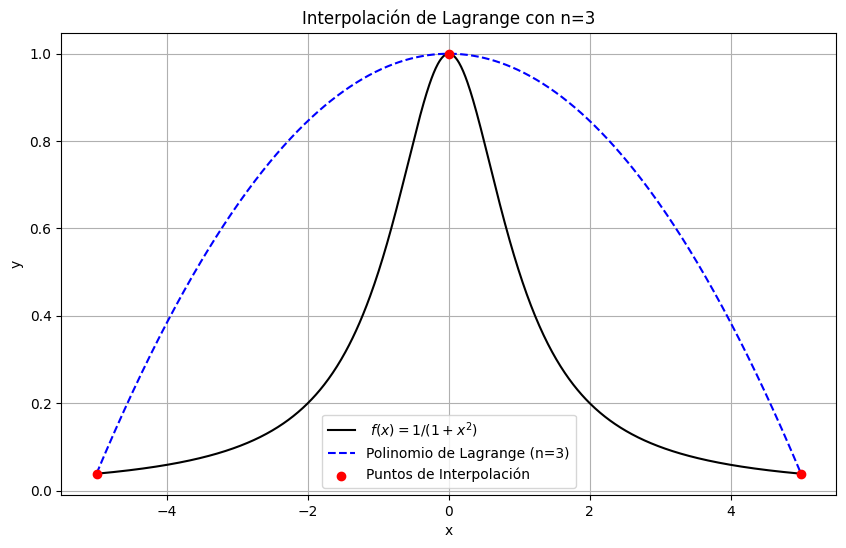

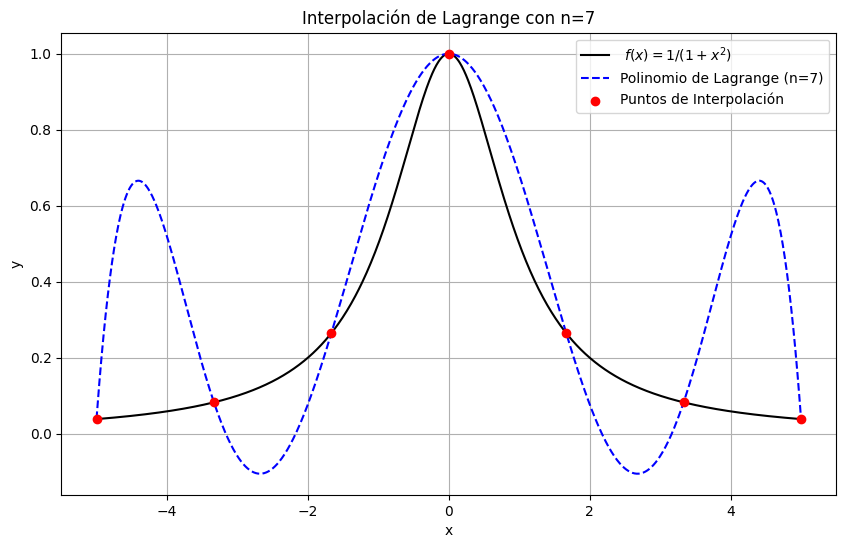

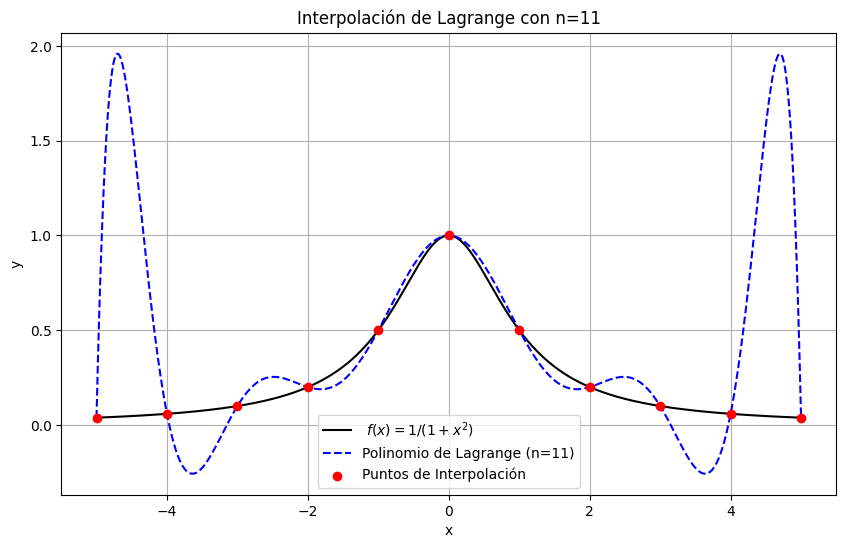

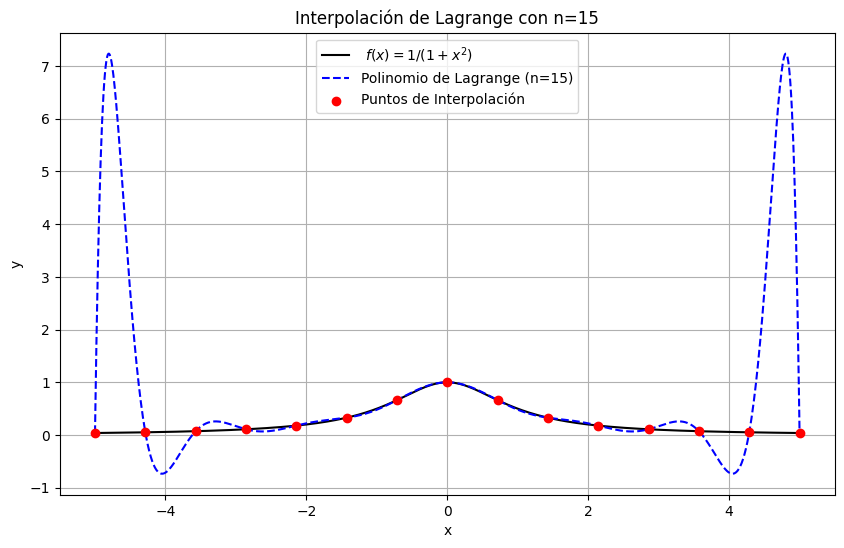

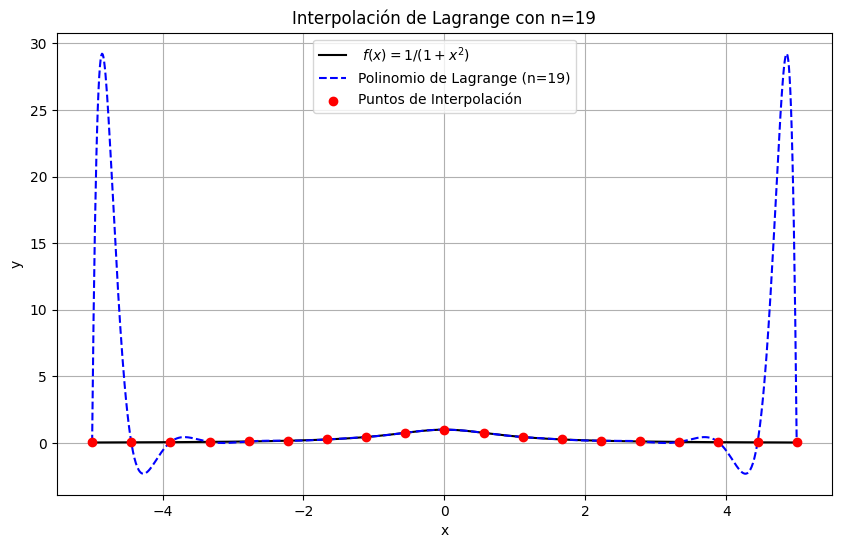

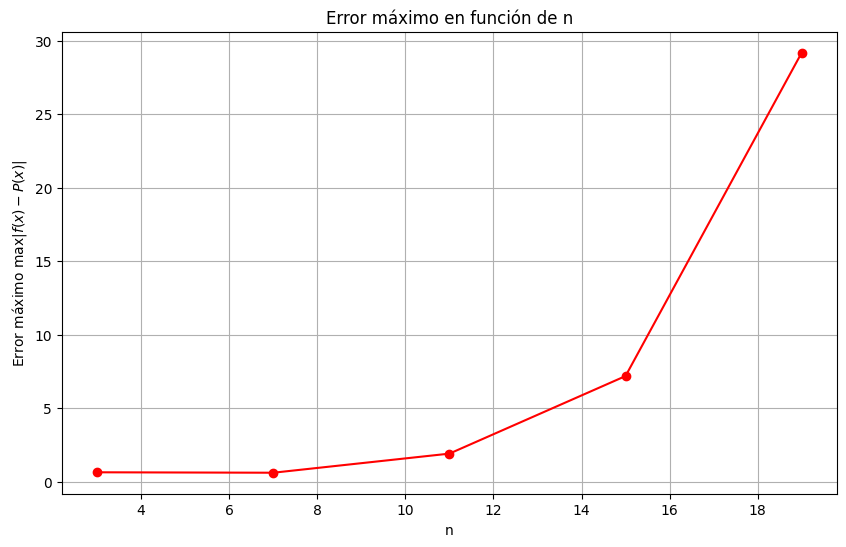

In [66]:
def f(x):
    return 1 / (1 + x**2)

a, b = -5, 5
n_values = [3, 7, 11, 15, 19]
max_errors = []

for n in n_values:
    x_points = np.linspace(a, b, n)
    y_points = f(x_points)
    polinomio_lagrange = lagrange(x_points, y_points)
    x_dense = np.linspace(a, b, 1000)
    y_lagrange = polinomio_lagrange(x_dense)   
    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, f(x_dense), label=' $f(x) = 1/(1 + x^2)$', color='black')
    plt.plot(x_dense, y_lagrange, label=f'Polinomio de Lagrange (n={n})', linestyle='--', color='blue')
    plt.scatter(x_points, y_points, color='red', zorder=5, label='Puntos de Interpolación')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolación de Lagrange con n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()
    y_true = f(x_dense)
    error = np.max(np.abs(y_true - y_lagrange))
    max_errors.append(error)



plt.figure(figsize=(10, 6))
plt.plot(n_values, max_errors, marker='o', color='red')
plt.xlabel('n')
plt.ylabel('Error máximo $\max |f(x) - P(x)|$')
plt.title('Error máximo en función de n')
plt.grid(True)
plt.show()

#### A medida que aumenta el n, por los graficos se puede ver que los polinomios se acercan mucho al grafico real de la función, pero, al tener puntos igualmente espaciados, un polinomio de alto grado puede presentar muchas oscilaciones, haciendo que pase lo que sale en la figura del error, que en mes de disminuir, va aumentando lo cual es contraintuitivo

## ii

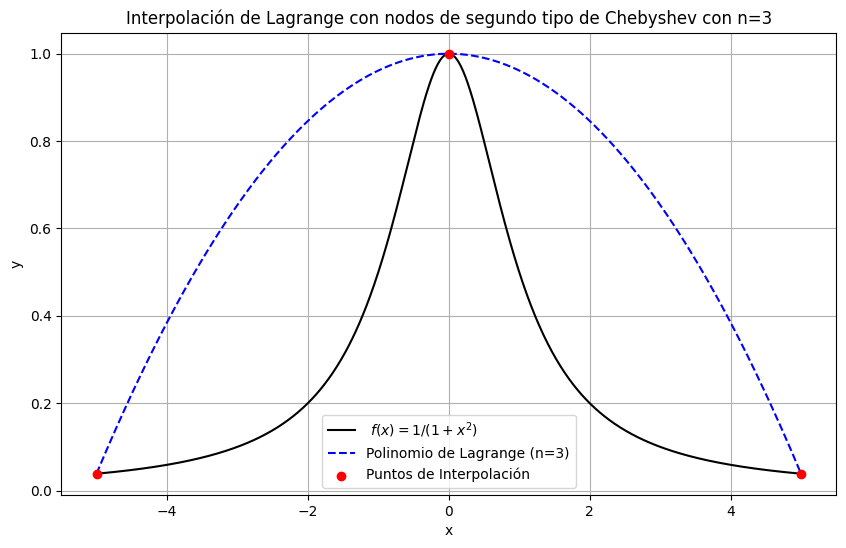

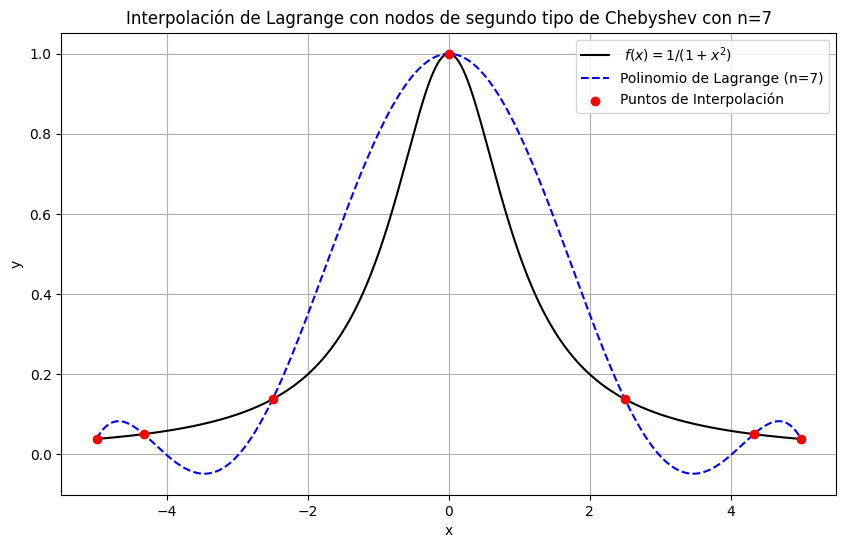

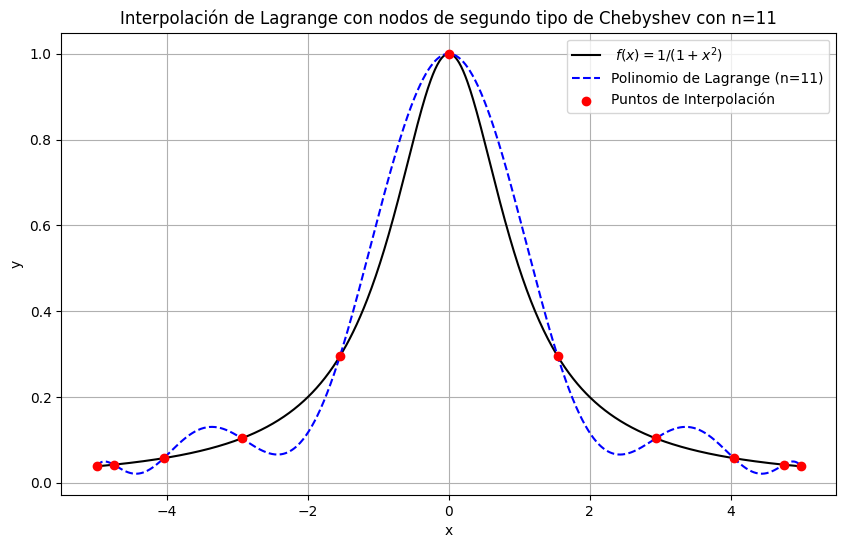

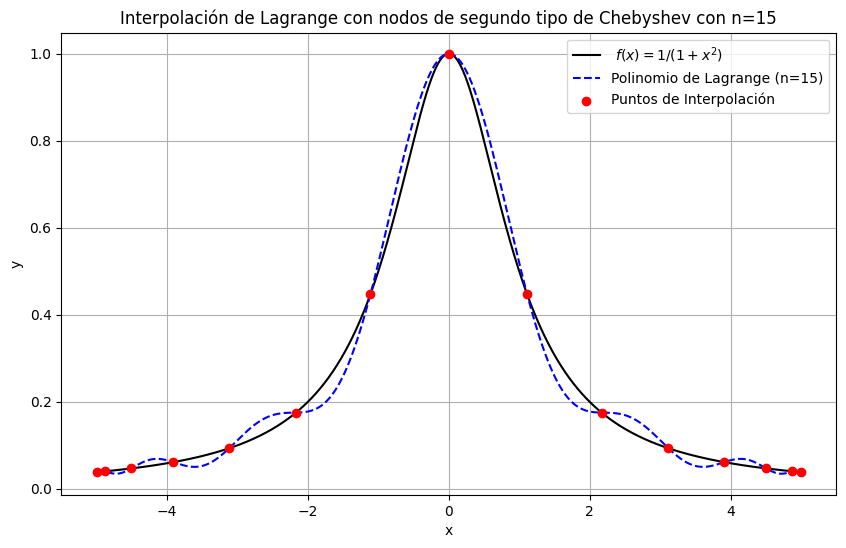

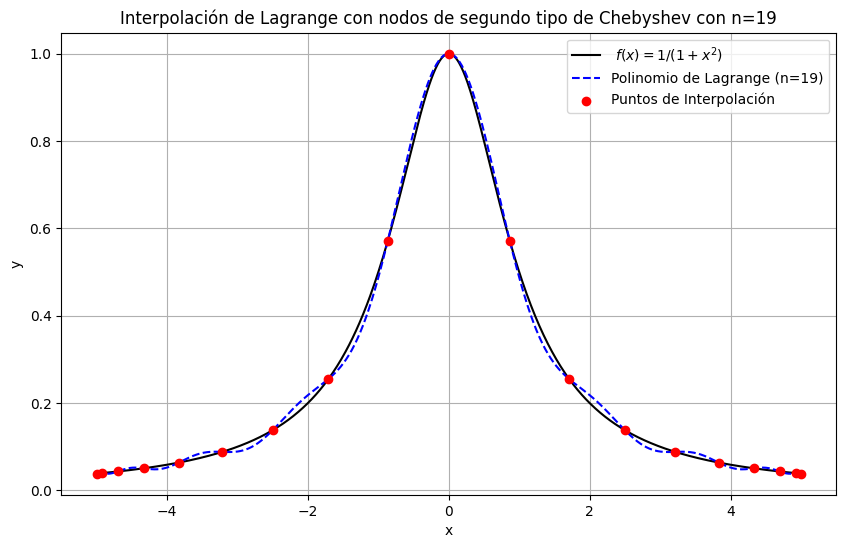

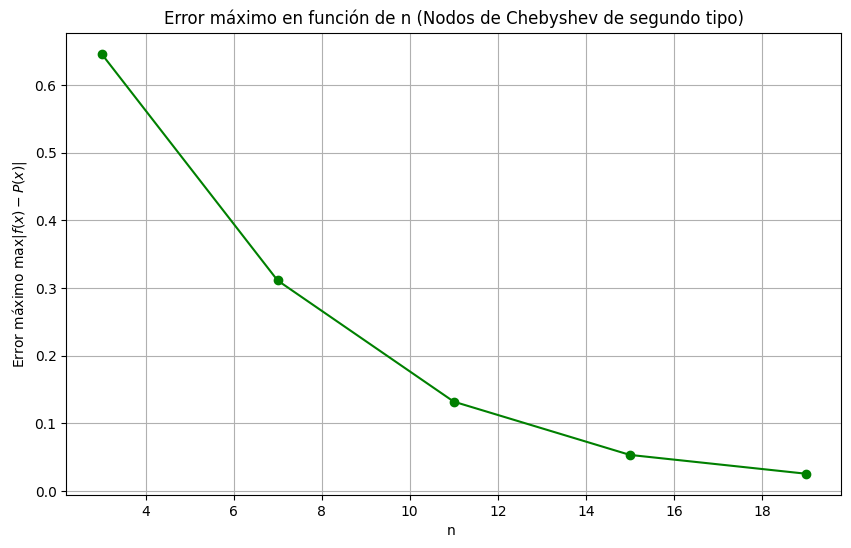

In [30]:
def f(x):
    return 1 / (1 + x**2)

n_values = [3, 7, 11, 15, 19]
max_errors = []

for n in n_values:
    i = np.arange(n)
    x_chebyshev = 5 * np.cos(i * np.pi / (n - 1))
    y_chebyshev = f(x_chebyshev)
    polinomio_lagrange = lagrange(x_chebyshev, y_chebyshev)
    x_dense = np.linspace(-5, 5, 1000)
    y_lagrange = polinomio_lagrange(x_dense)
    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, f(x_dense), label=' $f(x) = 1/(1 + x^2)$', color='black')
    plt.plot(x_dense, y_lagrange, label=f'Polinomio de Lagrange (n={n})', linestyle='--', color='blue')
    plt.scatter(x_chebyshev, y_chebyshev, color='red', zorder=5, label='Puntos de Interpolación')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolación de Lagrange con nodos de segundo tipo de Chebyshev con n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()
    y_true = f(x_dense)
    y_lagrange = polinomio_lagrange(x_dense)
    max_error = np.max(np.abs(y_true - y_lagrange))
    max_errors.append(max_error)


plt.figure(figsize=(10, 6))
plt.plot(n_values, max_errors, marker='o', color='green')
plt.xlabel('n ')
plt.ylabel('Error máximo $\max |f(x) - P(x)|$')
plt.title('Error máximo en función de n (Nodos de Chebyshev de segundo tipo)')
plt.grid(True)
plt.show()


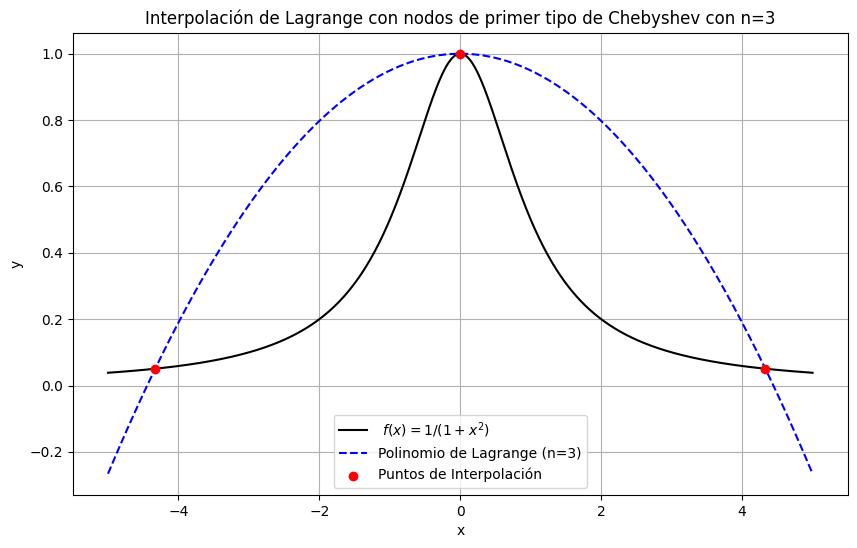

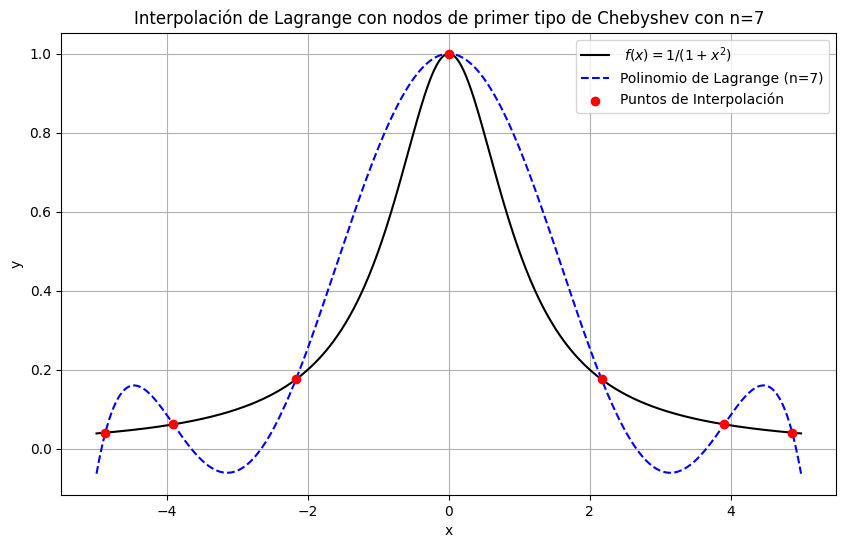

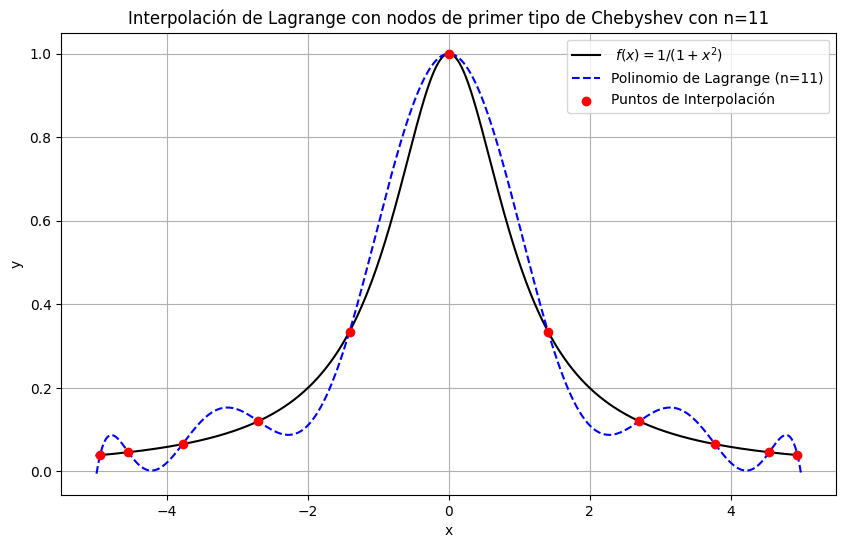

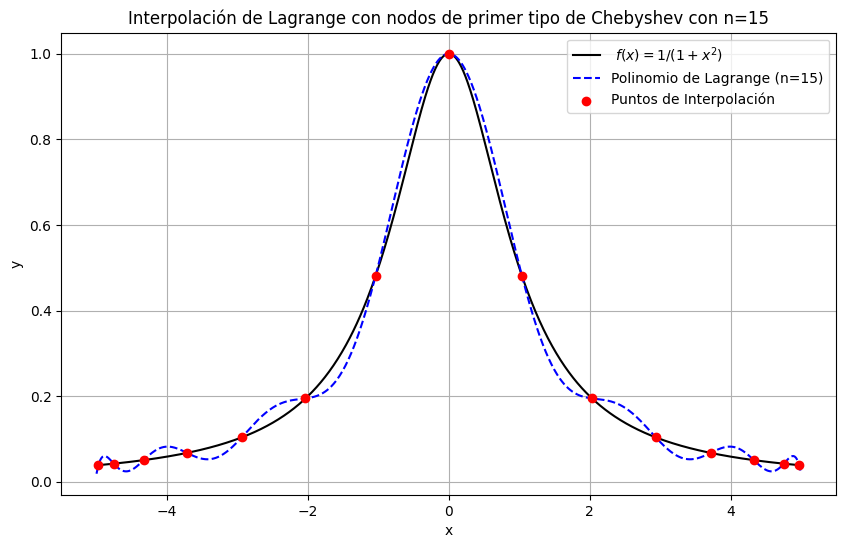

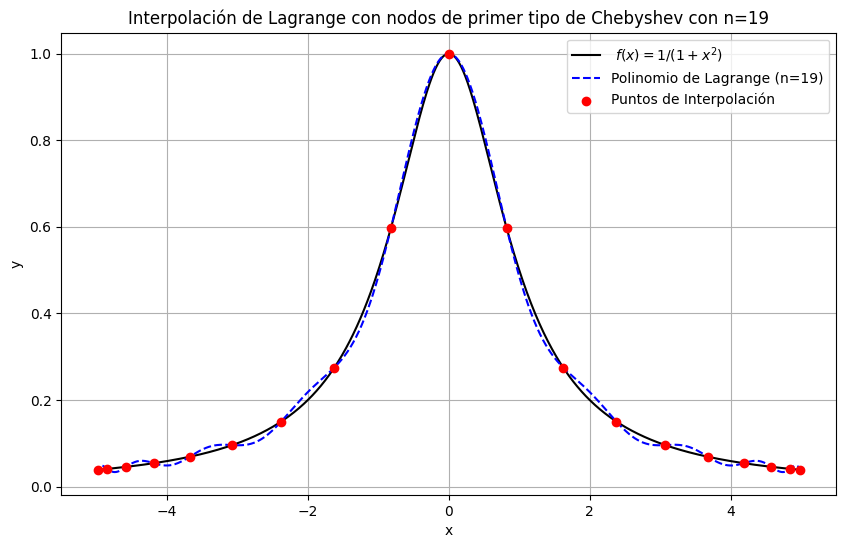

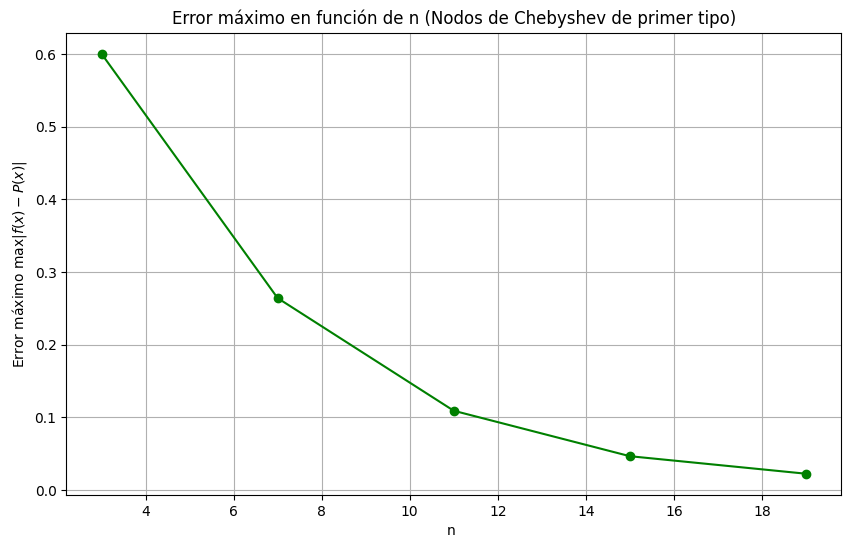

In [32]:
def f(x):
    return 1 / (1 + x**2)


n_values = [3, 7, 11, 15, 19]
max_errors = []

for n in n_values:
    i = np.arange(n)
    x_chebyshev = 5 * np.cos((2*i+1) * np.pi / (2*n))
    y_chebyshev = f(x_chebyshev)
    polinomio_lagrange = lagrange(x_chebyshev, y_chebyshev)
    x_dense = np.linspace(-5, 5, 1000)
    y_lagrange = polinomio_lagrange(x_dense)
    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, f(x_dense), label=' $f(x) = 1/(1 + x^2)$', color='black')
    plt.plot(x_dense, y_lagrange, label=f'Polinomio de Lagrange (n={n})', linestyle='--', color='blue')
    plt.scatter(x_chebyshev, y_chebyshev, color='red', zorder=5, label='Puntos de Interpolación')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Interpolación de Lagrange con nodos de primer tipo de Chebyshev con n={n}')
    plt.legend()
    plt.grid(True)
    plt.show()
    y_true = f(x_dense)
    y_lagrange = polinomio_lagrange(x_dense)
    max_error = np.max(np.abs(y_true - y_lagrange))
    max_errors.append(max_error)


plt.figure(figsize=(10, 6))
plt.plot(n_values, max_errors, marker='o', color='green')
plt.xlabel('n ')
plt.ylabel('Error máximo $\max |f(x) - P(x)|$')
plt.title('Error máximo en función de n (Nodos de Chebyshev de primer tipo)')
plt.grid(True)
plt.show()


#### Notemos que los graficos son decrecientes a mayor valor de n, puesto que  los puntos no son equiespaciados, los polinomios no forman tantos ciclos y por lo tanto el error maximo disminuye. 

## P3

<img src="p3a.jpg" alt="descripción_de_la_imagen">

<img src="p3b.jpg" alt="descripción_de_la_imagen">

<img src="p3c.jpg" alt="descripción_de_la_imagen">

## P4 i

### Hay varios cambios de variable que se pueden hacer, pero haremos el siguiente: 
### $\phi$ = $\phi_{0}$ $\sin^{2}$($\theta$)  ->$d \phi$=$2 \phi_{0} \sin(\theta)\cos(\theta)d\theta$
### Este cambio de variable transforma la integral en: 
$$
\int_{0}^{\pi/2 } \frac{ 2 \phi_{0} \sin(\theta)\cos(\theta)}{\sqrt{2(\cos(\phi_{0}\sin^{2}(\theta)) -\cos(\phi_{0}))}  } \, d\theta = \frac{4}{\pi} \int_{0}^{\pi/2 }  \sqrt{\frac{ \phi_{0}}{\sin^{2}(\phi_{0})-\sin^{2}(\phi_{0}\sin^{2}(\theta))}} \, d\theta 
$$
### El termino dentro de la raiz cuadrada no se anula tan bruscamente como antes, por lo que la integral se vuelve "tratable" numericamente.

## ii

In [67]:
def simpson_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)   
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

## iii

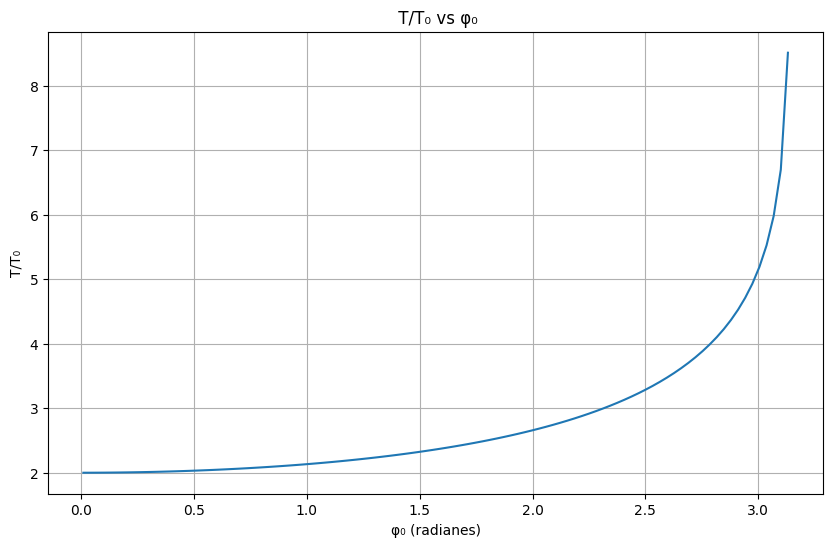

In [68]:
def integrando(theta, phi0):
    return 1 / np.sqrt(1 - (np.sin(phi0 / 2) * np.sin(theta))**2)

def simpson_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

def periodo(phi0, n=1000):
    f = lambda theta: integrando(theta, phi0)
    return (4/np.pi) * simpson_rule(f, 0, np.pi/2, n)


phi0_values = np.linspace(0.01, np.pi-0.01, 100)
T_T0 = [periodo(phi0) for phi0 in phi0_values]


plt.figure(figsize=(10, 6))
plt.plot(phi0_values, T_T0)
plt.xlabel('φ₀ (radianes)')
plt.ylabel('T/T₀')
plt.title(' T/T₀ vs φ₀')
plt.grid(True)
plt.show()
